In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.PassengerId.count()

891

In [6]:
data.shape

(891, 12)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data = data.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

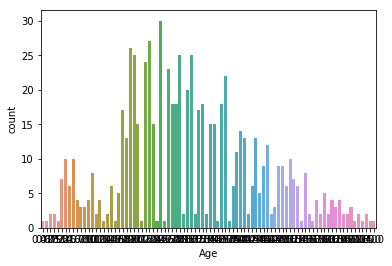

In [9]:
sns.countplot(data.Age);

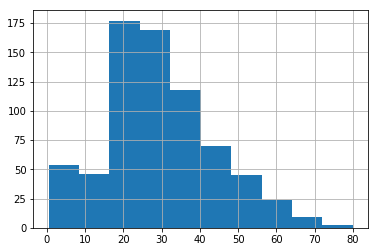

In [10]:
data.Age.hist()

In [11]:
mean = int(data.Age.mean(skipna=True))

In [12]:
mean

29

In [13]:
data.Age = data.Age.replace(np.NaN, mean)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [15]:
data = data.dropna()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [17]:
data.Sex = data['Sex'].replace('male',1)
data.Sex = data.Sex.replace('female',0)

In [18]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data.Embarked = data.Embarked.replace('C',0)
data.Embarked = data.Embarked.replace('Q',1)
data.Embarked = data.Embarked.replace('S',2)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [21]:
y = data.Survived

In [22]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [23]:
X = data.drop('Survived', axis=1)

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [25]:
model = RandomForestClassifier()

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 777 to 521
Data columns (total 6 columns):
Pclass      711 non-null int64
Sex         711 non-null int64
Age         711 non-null float64
SibSp       711 non-null int64
Parch       711 non-null int64
Embarked    711 non-null int64
dtypes: float64(1), int64(5)
memory usage: 38.9 KB


In [27]:
model.fit(X_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
y_predict = model.predict(X_test)

In [29]:
accuracy_score(y_predict, y_test)

0.7752808988764045

In [30]:
data_test_full = pd.read_csv('titanic_test.csv')

In [31]:
data_test_full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
data_test = data_test_full.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)

In [33]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [34]:
data_test.Sex = data_test['Sex'].replace('male',1)
data_test.Sex = data_test.Sex.replace('female',0)
data_test.Embarked = data_test.Embarked.replace('C',0)
data_test.Embarked = data_test.Embarked.replace('Q',1)
data_test.Embarked = data_test.Embarked.replace('S',2)

In [35]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [36]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null int64
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [37]:
mean_test = int(data_test.Age.mean(skipna=True))
data_test.Age = data_test.Age.replace(np.NaN, mean_test)

In [38]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null int64
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [39]:
y_pred_test = model.predict(data_test)

In [40]:
print(y_pred_test)

[0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 0 1 1 0 1 0]


In [41]:
Survived = y_pred_test

In [42]:
data_test_full['Survived'] = y_pred_test

In [43]:
data_test_full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [44]:
gender_submission = data_test_full[['PassengerId','Survived']]

In [45]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [46]:
gender_submission.to_csv('gender_submission.csv')